In [1]:
import pandas as pd  
from datetime import datetime
from fbprophet import Prophet

In [13]:
df_train_day = pd.read_csv("../raw_data/train.csv")
df_train_day['date']=df_train_day['date'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d %H:%M:%S"))
df_train_day['ds'] = df_train_day['date'].dt.strftime('%Y-%m-%d').apply(lambda _: datetime.strptime(_,"%Y-%m-%d"))
print(df_train_day['ds'].dtypes)
df_train_day = df_train_day.groupby(pd.Grouper(key='ds', axis=0)).sum()
df_train_day = df_train_day.drop(columns=["metropolitan_area_code"])
df_train_day = df_train_day.rename(columns={'energy_consumption':'y'})

print(df_train_day['ds'].dtypes)
#df_train_day['ds'] = pd.to_datetime(df_train_day['ds'], format='%Y-%m-%d')



datetime64[ns]


KeyError: 'ds'

In [35]:
df_train_day = pd.read_csv("../raw_data/train.csv")
df_train_day['ds'] = df_train_day['date'].str[:10]
df_train_day = df_train_day.groupby(pd.Grouper(key='ds', axis=0)).sum()
df_train_day = df_train_day.drop(columns=["metropolitan_area_code"])
df_train_day = df_train_day.rename(columns={'energy_consumption':'y'})

df_train_day.to_csv('../raw_data/df_train_day.csv')
df_train_day = pd.read_csv("../raw_data/df_train_day.csv")
df_train_day['ds']=df_train_day['ds'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d"))

df_train_day

,ds,y
0,2017-09-11,222115.0
1,2017-09-12,235984.0
2,2017-09-13,248470.0
3,2017-09-14,179814.0
4,2017-09-15,197696.0
...,...,...
1776,2017-05-06,140895.0
1777,2017-05-07,158332.0
1778,2017-05-08,173610.0
1779,2017-05-09,178410.0


In [43]:
df_train_day = pd.read_csv("../raw_data/train.csv")
df_train_day['ds'] = df_train_day['date'].str[:10]
df_train_day = df_train_day.groupby(pd.Grouper(key='ds', axis=0)).sum()
df_train_day = df_train_day.drop(columns=["metropolitan_area_code"])
df_train_day = df_train_day.rename(columns={'energy_consumption':'y'})

#df_train_day.to_csv('../raw_data/df_train_day.csv')
#df_train_day = pd.read_csv("../raw_data/df_train_day.csv")
#df_train_day['ds']=df_train_day['ds'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d"))

df_train_day

,y
ds,
2017-09-11,222115.0
2017-09-12,235984.0
2017-09-13,248470.0
2017-09-14,179814.0
2017-09-15,197696.0
...,...
2017-05-06,140895.0
2017-05-07,158332.0
2017-05-08,173610.0


In [37]:
df_test_day = pd.read_csv("../raw_data/test.csv")
df_test_day['ds'] = df_test_day['date'].str[:10]
df_test_day = df_test_day.groupby(pd.Grouper(key='ds', axis=0)).sum()
df_test_day = df_test_day.drop(columns=["metropolitan_area_code"])

df_test_day.to_csv('../raw_data/df_train_day.csv')
df_test_day = pd.read_csv("../raw_data/df_train_day.csv")
df_test_day['ds']=df_test_day['ds'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d"))

df_test_day

,ds,id
0,2022-01-01,12821486
1,2022-01-02,13229390
2,2022-01-03,13256552
3,2022-01-04,12612093
4,2022-01-05,13077220
...,...,...
115,2022-04-26,18071142
116,2022-04-27,18331605
117,2022-04-28,18032929
118,2022-04-29,15938825


In [36]:
model = Prophet(seasonality_mode='multiplicative')

model.fit(df_train_day)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -25.6933


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3781.24    0.00691408       161.189      0.4456           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3793.74   0.000651768       69.2665      0.7523      0.7523      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       3796.13   0.000370133       205.182   3.083e-06       0.001      422  LS failed, Hessian reset 
     299       3797.91    0.00647843       359.424      0.8803      0.8803      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     319       3798.45   9.25674e-05       73.2034   1.533e-06       0.001      508  LS failed, Hessian reset 
     387       3798.82   7.93152e-05       84.1106    1.16e-06       0.001      631  LS failed, Hessian reset 
     399       3798.86   0.000476307  

In [39]:
forecast_test = model.predict(df_test_day)
forecast_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2022-01-01,373056.312283,385425.293247,506686.005258,373056.312283,373056.312283,0.198972,0.198972,0.198972,-0.060964,-0.060964,-0.060964,0.259936,0.259936,0.259936,0.0,0.0,0.0,447284.016046
1,2022-01-02,373127.843897,375024.688799,492956.466378,373127.843897,373127.843897,0.162652,0.162652,0.162652,-0.104914,-0.104914,-0.104914,0.267565,0.267565,0.267565,0.0,0.0,0.0,433817.674232
2,2022-01-03,373199.375511,428023.331113,551546.760038,373199.375511,373199.375511,0.310537,0.310537,0.310537,0.034669,0.034669,0.034669,0.275868,0.275868,0.275868,0.0,0.0,0.0,489091.673662
3,2022-01-04,373270.907125,428802.685629,550362.948600,373270.907125,373270.907125,0.319906,0.319906,0.319906,0.035165,0.035165,0.035165,0.284741,0.284741,0.284741,0.0,0.0,0.0,492682.609073
4,2022-01-05,373342.438740,435218.189527,555583.630514,373342.438740,373342.438740,0.324324,0.324324,0.324324,0.030252,0.030252,0.030252,0.294072,0.294072,0.294072,0.0,0.0,0.0,494426.260082


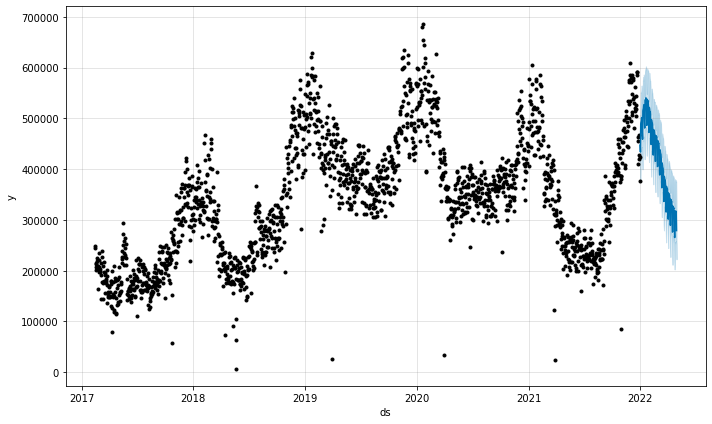

In [40]:
model.plot(forecast_test);

In [1]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
initial = f'{10} days' # needs to be in exactly this format
period = f'{10} days'
horizon = '10 days'
df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 177 forecasts with cutoffs between 2017-02-25 00:00:00 and 2021-12-21 00:00:00


  0%|          | 0/177 [00:00<?, ?it/s]